In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
import json
# Import API key
from api_keys import g_key
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [107]:
csvpath1 = os.path.join('.', 'input_data', 'beers.csv')
csvpath2 = os.path.join('.', 'input_data', 'breweries.csv')

df_beer = pd.read_csv(csvpath1)
df_brew = pd.read_csv(csvpath2)

df_brew['brewery_id'] = df_brew.index

df = df_beer.merge(df_brew, on="brewery_id")
print(df.shape)
print(df.info())
df.head()

(2410, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  2410 non-null   int64  
 1   abv           2348 non-null   float64
 2   ibu           1405 non-null   float64
 3   id            2410 non-null   int64  
 4   name_x        2410 non-null   object 
 5   style         2405 non-null   object 
 6   brewery_id    2410 non-null   int64  
 7   ounces        2410 non-null   float64
 8   Unnamed: 0_y  2410 non-null   int64  
 9   name_y        2410 non-null   object 
 10  city          2410 non-null   object 
 11  state         2410 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 244.8+ KB
None


,Unnamed: 0_x,abv,ibu,id,name_x,style,brewery_id,ounces,Unnamed: 0_y,name_y,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN


In [108]:
# Name is repeated name, its beer name and brewery name from the respective CSV files
df = df.rename(index=str, columns={"name_x":"beer_name", "name_y":"brewery_name"})

# These 2 columns are just the index as well as the brewery ID repeated
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

# Make ABV a percentage for readability in the plots
df['abv'] = df['abv']*100

# Replace NaN values with 0 in ibu (bitterness)
df=df.fillna(value=0)

print(f"{len(df)}, {len(df.columns)}")
df.head()

2410, 10


,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,5.0,0.0,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,6.6,0.0,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,7.1,0.0,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,9.0,0.0,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,7.5,0.0,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [109]:
states_breweries=df.groupby(['state']).count()
states_breweries_top=states_breweries.sort_values(by='beer_name', axis=0, ascending=False)
states_breweries_top.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city
state,,,,,,,,,
CO,265,265,265,265,265,265,265,265,265
CA,183,183,183,183,183,183,183,183,183
MI,162,162,162,162,162,162,162,162,162
IN,139,139,139,139,139,139,139,139,139
TX,130,130,130,130,130,130,130,130,130


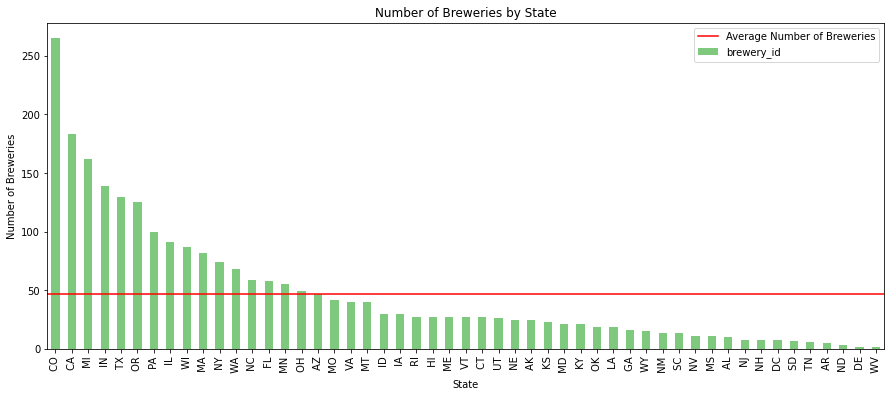

In [110]:
plot = states_breweries_top['brewery_id'].plot(kind='bar', title="Number of Breweries by State", 
#plot = df['state'].value_counts().plot(kind='bar', title="Number of Breweries by State", 
                             figsize=(15,6), colormap='Accent')
plot.set_xlabel('State')
plot.set_ylabel('Number of Breweries')
mean_line = plot.axhline(df.state.value_counts().mean(), color='r', label='Average Number of Breweries')
plt.legend()

In [111]:
cities_breweries=df.groupby(['city']).count()
cities_breweries_top=cities_breweries.sort_values(by='brewery_name', axis=0, ascending=False)
cities_breweries_top.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,state
city,,,,,,,,,
Grand Rapids,66,66,66,66,66,66,66,66,66
Portland,64,64,64,64,64,64,64,64,64
Chicago,55,55,55,55,55,55,55,55,55
Indianapolis,43,43,43,43,43,43,43,43,43
San Diego,42,42,42,42,42,42,42,42,42


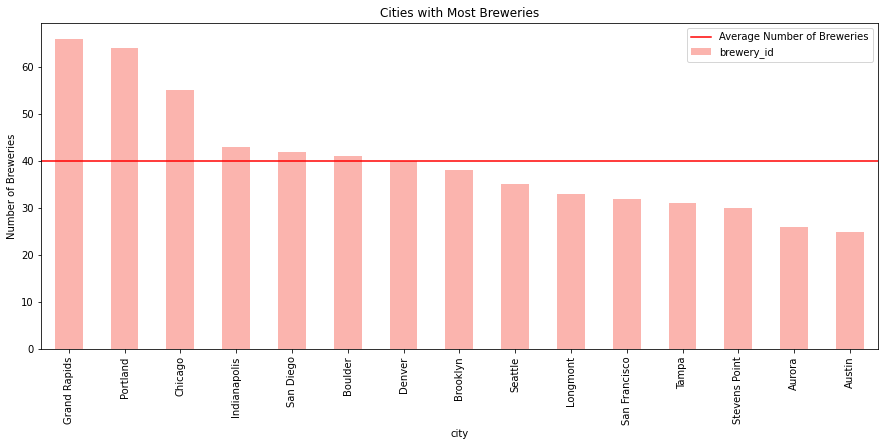

In [112]:
plot2 = cities_breweries_top['brewery_id'].nlargest(15).plot(kind='bar', 
               title='Cities with Most Breweries', figsize=(15,6),
               colormap='Pastel1')
mean_line2 = plot2.axhline(df.groupby('city')['brewery_name'].count().nlargest(15).mean(), 
                           color='r', label='Average Number of Breweries')
plot2.set_ylabel('Number of Breweries')
plt.legend()

In [113]:
beer_style=df.groupby(['style']).count()
beer_style_top=beer_style.sort_values(by='id', axis=0, ascending=False)
beer_style_top.head()

,abv,ibu,id,beer_name,brewery_id,ounces,brewery_name,city,state
style,,,,,,,,,
American IPA,424,424,424,424,424,424,424,424,424
American Pale Ale (APA),245,245,245,245,245,245,245,245,245
American Amber / Red Ale,133,133,133,133,133,133,133,133,133
American Blonde Ale,108,108,108,108,108,108,108,108,108
American Double / Imperial IPA,105,105,105,105,105,105,105,105,105


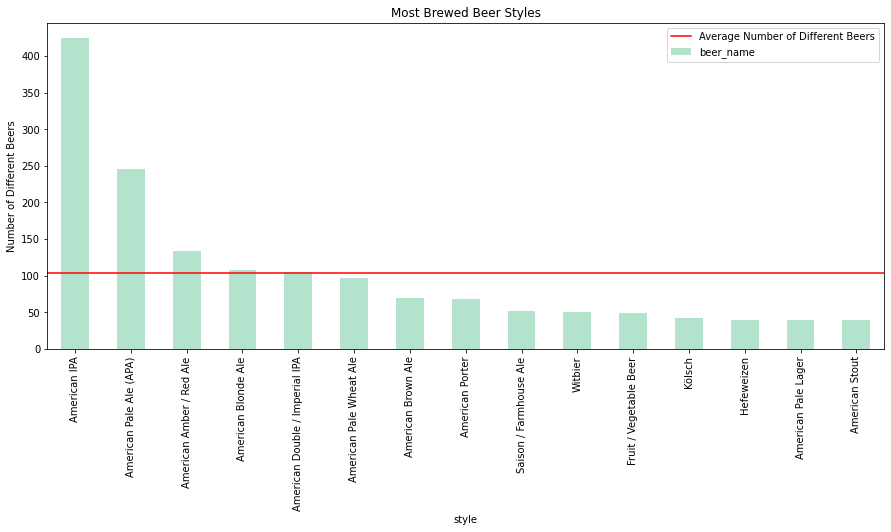

In [114]:
plot3 = beer_style_top['beer_name'].nlargest(15).plot(kind='bar', 
#plot3 = df.groupby('style')['beer_name'].count().nlargest(15).plot(kind='bar', 
               title='Most Brewed Beer Styles', figsize=(15,6),
               colormap='Pastel2',  )
mean_line3 = plot3.axhline(df.groupby('style')['beer_name'].count().nlargest(15).mean(), 
                           color='r', label='Average Number of Different Beers')
plot3.set_ylabel('Number of Different Beers')
plt.legend()

In [115]:
beer_abv = df.groupby('style')['abv'].mean()
beer_abv_top=beer_abv.sort_values(axis=0, ascending=False)
beer_abv_top.head()

style
English Barleywine        10.766667
Quadrupel (Quad)          10.400000
American Barleywine        9.900000
American Malt Liquor       9.900000
Russian Imperial Stout     9.763636
Name: abv, dtype: float64

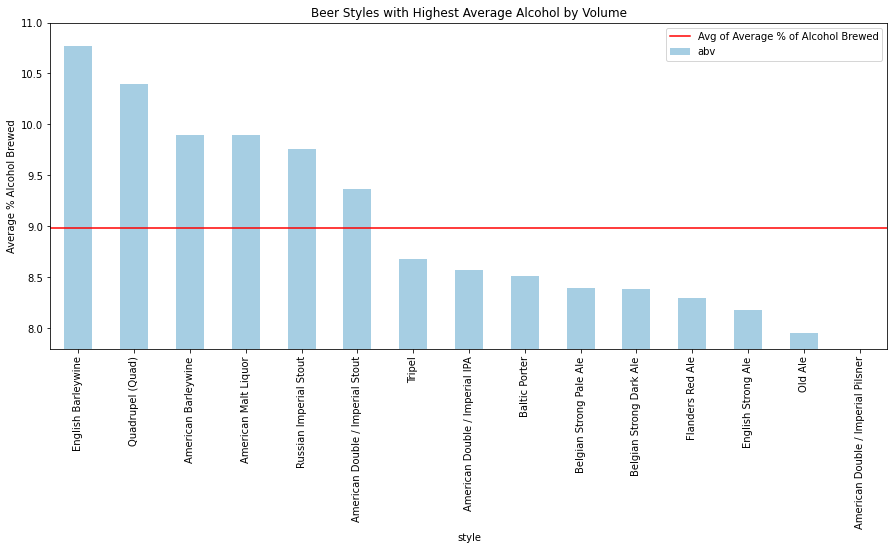

In [116]:
# Using nlargest - Return the first n rows with the largest values in columns, in descending order
 
plot4 = beer_abv_top.nlargest(15).plot(kind='bar', 
               title='Beer Styles with Highest Average Alcohol by Volume', figsize=(15,6),
               colormap='Paired', ylim=(7.8,11))
mean_line4 = plot4.axhline(df.groupby('style')['abv'].mean().nlargest(15).mean(), 
                           color='r', label='Avg of Average % of Alcohol Brewed')
plot4.set_ylabel('Average % Alcohol Brewed')
plt.legend()

In [117]:
states_beer_vol = df.groupby('state')['abv'].mean()
states_beer_vol_top = states_beer_vol.sort_values(axis=0, ascending=False)
states_beer_vol_top.head()

state
 DC    6.562500
 IN    6.248201
 IL    6.202198
 AL    6.200000
 WV    6.200000
Name: abv, dtype: float64

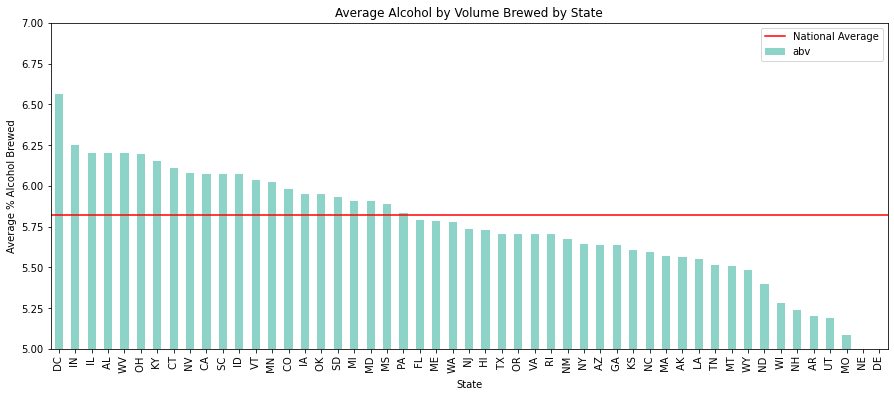

In [118]:
plot5 = states_beer_vol_top.plot(kind='bar',
                                title="Average Alcohol by Volume Brewed by State",
                                figsize=(15,6), ylim=(5, 7), colormap='Set3')
plot5.set_xlabel('State')
plot5.set_ylabel('Average % Alcohol Brewed')
mean_line5 = plot5.axhline(df.abv.mean(), color='r',
                         label='National Average')
plt.legend()